# The Exponential Integrate-and-Fire model

# 2.1. Exercise: rheobase threshold

The goal of this exercise is to study the minimal current that can elicit a spike and to understand the different notions of a firing threshold. The Exponential-Integrate-and-Fire neuron model has two threshold related parameters. They correspond to the named parameters v_spike and v_rheobase in the function simulate_exponential_IF_neuron().


**2.1.1. Question**

Set the function parameter v_spike to +10mV (which overrides the default value -30mV). What do you expect to happen? How many spikes will be generated?

nr of spikes: 7


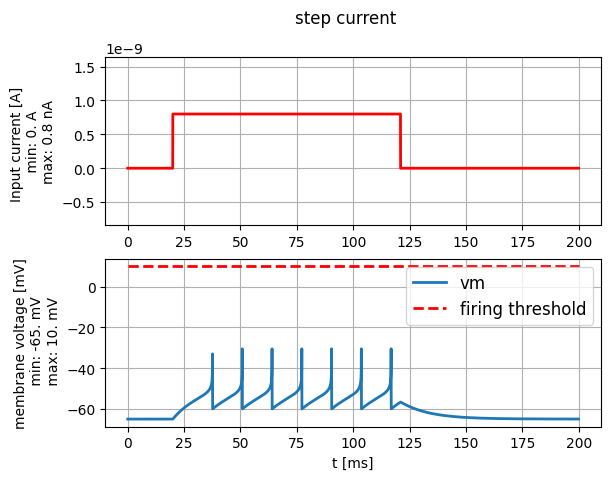

In [21]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory

thresh = 10 *b2.mV

input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms, v_spike = thresh)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current, title="step current",
    firing_threshold=thresh)

print("nr of spikes: {}".format(spike_monitor.count[0]))


nr of spikes: 7


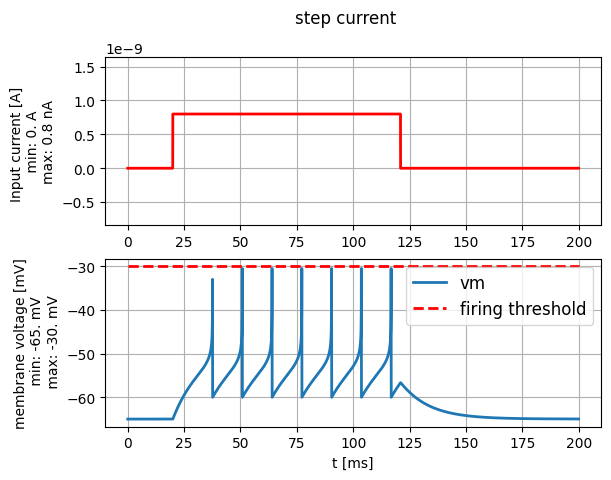

In [22]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory

thresh = -30 *b2.mV

input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms, v_spike = thresh)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current, title="step current",
    firing_threshold=thresh)

print("nr of spikes: {}".format(spike_monitor.count[0]))


v_spike corresponds to the voltage threshold for the spike condition. By increasing it, the likelihood of generating a spike is reduced. I would expect to see less spikes compared to the default value of -30 mV. However, what we see is that the same spikes are obtained when moving the firing threshold up to + 10 mV. It almost seems like the function does not implement the new threshold value appropriately. 

nr of spikes: 7


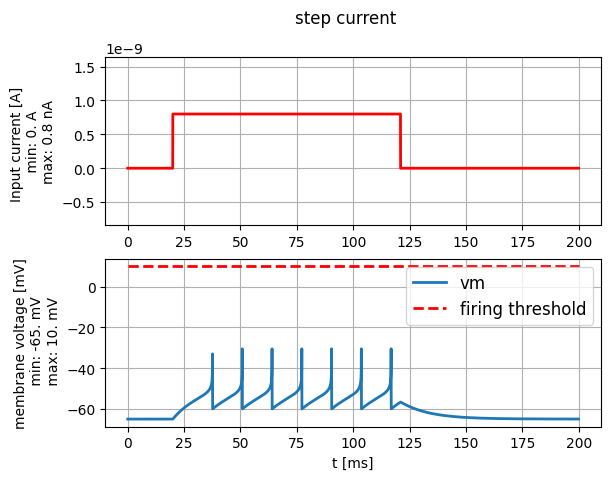

In [23]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory

import brian2 as b2
import matplotlib.pyplot as plt
import numpy
from neurodynex3.tools import input_factory

b2.defaultclock.dt = 0.05 * b2.ms

# default values.
MEMBRANE_TIME_SCALE_tau = 12.0 * b2.ms
MEMBRANE_RESISTANCE_R = 20.0 * b2.Mohm
V_REST = -65.0 * b2.mV
V_RESET = -60.0 * b2.mV
RHEOBASE_THRESHOLD_v_rh = -55.0 * b2.mV
SHARPNESS_delta_T = 2.0 * b2.mV


def simulate_exponential_IF_neuron(
        tau=MEMBRANE_TIME_SCALE_tau,
        R=MEMBRANE_RESISTANCE_R,
        v_rest=V_REST,
        v_reset=V_RESET,
        v_rheobase=RHEOBASE_THRESHOLD_v_rh,
        v_spike=exp_IF.FIRING_THRESHOLD_v_spike,
        delta_T=SHARPNESS_delta_T,
        I_stim=input_factory.get_zero_current(),
        simulation_time=200 * b2.ms):
    """
    Implements the dynamics of the exponential Integrate-and-fire model

    Args:
        tau (Quantity): Membrane time constant
        R (Quantity): Membrane resistance
        v_rest (Quantity): Resting potential
        v_reset (Quantity): Reset value (vm after spike)
        v_rheobase (Quantity): Rheobase threshold
        v_spike (Quantity) : voltage threshold for the spike condition
        delta_T (Quantity): Sharpness of the exponential term
        I_stim (TimedArray): Input current
        simulation_time (Quantity): Duration for which the model is simulated

    Returns:
        (voltage_monitor, spike_monitor):
        A b2.StateMonitor for the variable "v" and a b2.SpikeMonitor
    """

    eqs = """
    dv/dt = (-(v-v_rest) +delta_T*exp((v-v_rheobase)/delta_T)+ R * I_stim(t,i))/(tau) : volt
    """
    neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset", threshold="v>v_spike", method="euler")
    neuron.v = v_rest
    # monitoring membrane potential of neuron and injecting current
    voltage_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)

    # run the simulation
    net = b2.Network(neuron, voltage_monitor, spike_monitor)
    net.run(simulation_time)

    return voltage_monitor, spike_monitor

# Start the simulation

input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

# +10mV

# a technical threshold to tell the algorithm when to reset vm to v_reset
exp_IF.FIRING_THRESHOLD_v_spike = 10 *b2.mV	

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms, v_spike=exp_IF.FIRING_THRESHOLD_v_spike)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current, title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)

print("nr of spikes: {}".format(spike_monitor.count[0]))




Compute the minimal amplitude Irh of a constant input current such that the neuron will elicit a spike.
Validate your result: Modify your code and inject a current of amplitude Irh and 300ms duration into the expIF neuron.

Rheobase Threshold is -55. mV
Membrane resistance is 20. Mohm
Rheobase current is 0.5 nA
Nr of spikes: 7


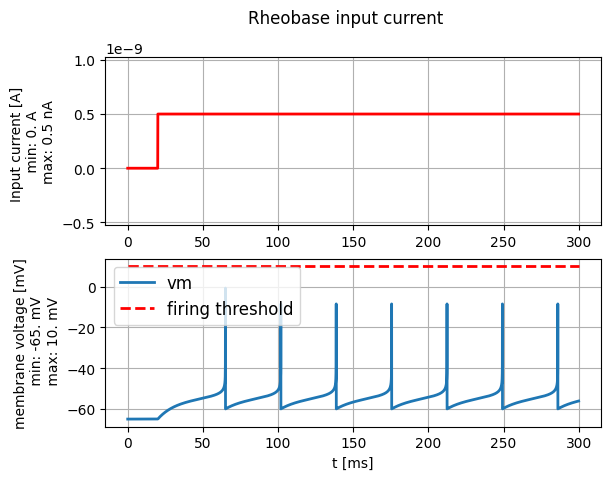

In [24]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory

#compute the minimal amplitude Irh of a constant input current such that the neuron will elicit a spike

print(f"Rheobase Threshold is {exp_IF.RHEOBASE_THRESHOLD_v_rh}")
print(f"Membrane resistance is {exp_IF.MEMBRANE_RESISTANCE_R}")

I_rheobase = (exp_IF.RHEOBASE_THRESHOLD_v_rh - exp_IF.V_REST) / exp_IF.MEMBRANE_RESISTANCE_R
print(f"Rheobase current is {I_rheobase}")

#implement in model

input_current = input_factory.get_step_current(
    t_start=20, t_end=320, unit_time=b2.ms, amplitude=I_rheobase)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, v_spike = +10 * b2.mV, simulation_time=300*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="Rheobase input current",
    firing_threshold = exp_IF.FIRING_THRESHOLD_v_spike)

print("Nr of spikes: {}".format(spike_monitor.count[0]))

# 2.2. Exercise: strength-duration curve

The minimal amplitude to elicit a spike depends on the duration of the current. For an infinitely long current, we’ve just calculated the rheobase current. For short pulses and step currents, we can “experimentally” determine the minimal currents. If we plot the amplitude versus duration, we get the strength-duration curve.

nr of spikes: 1


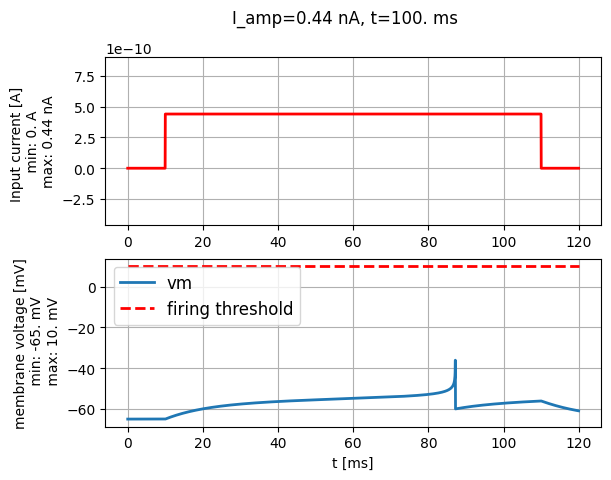

In [25]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory

i = 6 #change i and find the value that goes into min_amp
durations = [1,   2,    5,  10,   20,   50, 100]
min_amp =   [11, 4.42, 2.2, 1.10, .70, .48, 0.44]

t=durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))



Text(0, 0.5, 'min amplitude [nAmp]')

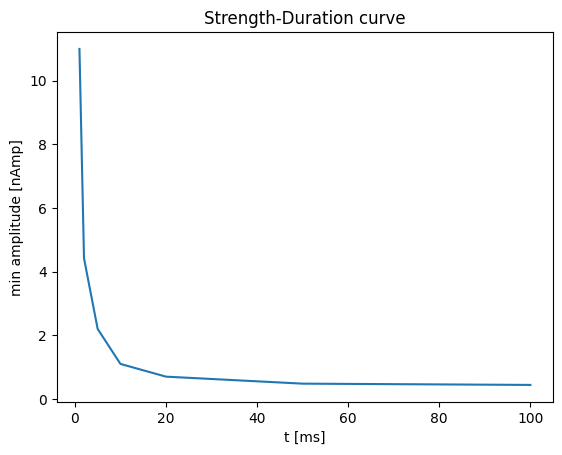

In [26]:
plt.plot(durations, min_amp)
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")
plt.ylabel("min amplitude [nAmp]")

The shape of the strength–duration curve for an exponential LIF neuron aligns with the classic excitability properties seen in simpler (linear) LIF neurons but highlights the rapid onset of spiking once the membrane potential nears threshold due to the exponential membrane current i. e. a higher amplitude is needed for a shorter pulse and vice versa. 